In [ ]:
# Imported pandaslibrary for datamanipulation and analysis
import pandas as Pndas

# Bringing in the numpy library to handle arrays and do numerical calculations
import numpy as nmpyLib

# Bringing in the matplotlib library to visualise data and plot graphs
import matplotlib.pyplot as plotLIB

# Adding the Seaborn library to improve statistical graphing and data visualisation
import seaborn as sBorn

# Importing LabelEncoder from sklearn to encode categoricalvariables into numericalformat
from sklearn.preprocessing import LabelEncoder

# Importing preprocessing module from sklearn for various preprocessing tasks
from sklearn import preprocessing

# Importing PlotlyExpress for creating interactive visualizations
import plotly.express as POX

# f_classif is imported in order to execute the ANOVAFtest for featureselection.
from sklearn.feature_selection import f_classif

# Importing RandomOverSampler from imbalanced-learn to handle class imbalance via oversampling
from imblearn.over_sampling import RandomOverSampler

# Importing ExtraTreesClassifier from sklearn for feature selection and classification tasks
from sklearn.ensemble import ExtraTreesClassifier

# To show eachclass's precisionscore, recallscore, F1score, and supportscore, import the classificationreport.
from sklearn.metrics import classification_report

# Importing time library for tracking the execution time of code
import time

# Using Plotly's figure_factory import to produce intricate figures and visualisations
import plotly.figure_factory as ff

# Graph_objects are imported from Plotly to create figures and personalise visualisations.
import plotly.graph_objects as go

# ROC curve and AUC score are calculated by importing roc_curve and roc_auc_score.
from sklearn.metrics import roc_curve, roc_auc_score

# Defining and trainingneuralnetworks by importing a sequentialmodel from TensorFlow/Keras
from keras.utils import to_categorical

# Since the time library was already imported, it is being imported once more.
import time

# The TensorFlow/Keras sequential model must be imported in order to define and train neural networks.
from tensorflow.keras.models import Sequential

# Bringing in neuralnetworklayers from Keras, suchas Conv1D, Dense, Flatten, and Dropout
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout

# Importing Keras' Adam optimiser to maximise neuralnetworktraining
from tensorflow.keras.optimizers import Adam

# Bringing in StandardScaler to scale and normalise features to unit variance and zero mean
from sklearn.preprocessing import StandardScaler

# Using synthetic data creation, ADASYN is imported from imbalancedlearn to handle imbalanceddatasets.
from imblearn.over_sampling import ADASYN

# Creating training and test sets from the dataset by importing train_test_split
from sklearn.model_selection import train_test_split

# Importing various metrics like accuracyscore, precisionscore, recallscore, F1score, and ROCAUC score for evaluating classificationperformance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Importing additional metrics like ROCcurve, precisionrecallCurve, and confusionmatrix for evaluatingmodelperformance
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix

import warnings  # Imported warningslibrary to manage warningmessages during codeexecution
warnings.filterwarnings('ignore')  # Suppressing warningmessages to avoidcluttering outputduringruntime

### ***Data Loading***

In [ ]:
# loading the dataset path
JM1Dataset = Pndas.read_csv('/content/drive/MyDrive/S_N_Project/JM1 - dataset.csv')

### ***Data Preprocessing***

In [ ]:
# Define the column names
column_names = [
    'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
    'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
    'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'
]

# Assign column names to DataFrame
JM1Dataset.columns = column_names

In [ ]:
# checking the top five rows of the JM1Dataset
JM1Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,72,7,1,6,198,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
2,190,3,1,3,600,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
3,37,4,1,4,126,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
4,31,2,1,2,111,582.52,0.08,12.25,47.55,7135.87,...,19,0,5,0,14,24,69,42,3,True


In [ ]:
# checking the last five rows of the JM1Dataset
JM1Dataset.tail()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
10879,18,4,1,4,52,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10880,9,2,1,2,30,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10881,42,4,1,2,103,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10882,10,1,1,1,36,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False
10883,19,3,1,1,58,272.63,0.09,11.57,23.56,3154.67,...,13,0,2,1,12,14,31,27,5,False


In [ ]:
# get the info of the JM1Dataset
JM1Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10884 entries, 0 to 10883
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10884 non-null  int64  
 1   v(g)               10884 non-null  int64  
 2   ev(g)              10884 non-null  int64  
 3   iv(g)              10884 non-null  int64  
 4   n                  10884 non-null  int64  
 5   v                  10884 non-null  float64
 6   l                  10884 non-null  float64
 7   d                  10884 non-null  float64
 8   i                  10884 non-null  float64
 9   e                  10884 non-null  float64
 10  b                  10884 non-null  float64
 11  t                  10884 non-null  float64
 12  lOCode             10884 non-null  int64  
 13  lOComment          10884 non-null  int64  
 14  lOBlank            10884 non-null  int64  
 15  locCodeAndComment  10884 non-null  int64  
 16  uniq_Op            108

In [ ]:
# checking the null value of the
JM1Dataset.isnull().sum()

,0
loc,0
v(g),0
ev(g),0
iv(g),0
n,0
v,0
l,0
d,0
i,0
e,0


In [ ]:
# describing the JM1Dataset
JM1Dataset.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,10884.000000,1.088400e+04,10884.000000,1.088400e+04,10884.000000,10884.000000,10884.000000,10884.000000
mean,42.019938,6.349044,3.401231,4.001838,114.400129,673.819802,0.135228,14.178421,29.442130,3.683975e+04,0.224667,2.046653e+03,26.254502,2.737596,4.625781,0.370636
std,76.595847,13.020206,6.772153,9.117274,249.511198,1938.934555,0.160157,18.710352,34.418837,4.343876e+05,0.646356,2.413265e+04,59.613487,9.009019,9.968557,1.907992
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.000000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.000000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.705000,0.160000,18.902500,36.782500,1.141644e+04,0.210000,6.342500e+02,28.000000,2.000000,5.000000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.000000,108.000000


In [ ]:
# Check for '?' in the dataset
question_marks = JM1Dataset.applymap(lambda x: '?' in str(x)).sum()
print(question_marks)

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64


In [ ]:
# Replace '?' in the dataset with NaN (Not a Number) to handle missing values
JM1Dataset.replace('?', nmpyLib.nan, inplace=True)

# Output how many nullvalues there are in each dataset column.
print(JM1Dataset.isnull().sum())

# List of numeric columns that need to be converted to numeric data types
numeric_cols = ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

# Convert each specified column to numeric, coercing errors (e.g., invalid entries) to NaN
for col in numeric_cols:
    JM1Dataset[col] = Pndas.to_numeric(JM1Dataset[col], errors='coerce')

# Use the mean of each numeric column to fill in NaN values.
for col in numeric_cols:
    JM1Dataset[col].fillna(JM1Dataset[col].mean(), inplace=True)

# Print a separator for clarity in the output
print('------------------------')

# Print the count of null values in each column of the dataset after filling NaNs
print(JM1Dataset.isnull().sum())

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64
------------------------
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd         

### ***Data Visualization***

In [ ]:
# Using Plotly Express, create a scatter plot to show "loc" vs. "v(g)" with colour representing "defects."
fig = POX.scatter(JM1Dataset,  # Using the CM1Dataset for the plot
                  x='loc',  # Setting 'loc' as the x-axis variable
                  y='v(g)',  # Setting 'v(g)' as the y-axis variable
                  color='defects',  # Coloring the points based on the 'defects' column
                  title='Scatter Plot of loc vs v(g) by Defects')  # Defining the plot title

# Updating the layout of the plot to add axis titles and adjust size
fig.update_layout(xaxis_title='loc',  # Labeling the x-axis as 'loc'
                  yaxis_title='v(g)',  # Labeling the y-axis as 'v(g)'
                  width=1000,  # Setting the width of the plot to 1000 pixels
                  height=600)  # Setting the height of the plot to 600 pixels

# Putting scatter ploted on display
fig.show()

In [ ]:
# Creating a scatter plot using Plotly Express to visualize 'ev(g)' vs 'iv(g)' with color indicating 'defects'
fig = POX.scatter(JM1Dataset,  # Using the CM1Dataset for the plot
                  x='ev(g)',  # Setting 'ev(g)' as the x-axis variable
                  y='iv(g)',  # Setting 'iv(g)' as the y-axis variable
                  color='defects',  # Coloring the points based on the 'defects' column
                  title='Scatter Plot of ev(g) vs iv(g) by Defects')  # Defining the plot title

# Updating the layout of the plot to add axis titles and adjust size
fig.update_layout(xaxis_title='ev(g)',  # Labeling the x-axis as 'ev(g)'
                  yaxis_title='iv(g)',  # Labeling the y-axis as 'iv(g)'
                  width=1000,  # Setting the width of the plot to 1000 pixels
                  height=600)  # Setting the height of the plot to 600 pixels

# Displaying the scatter plot
fig.show()

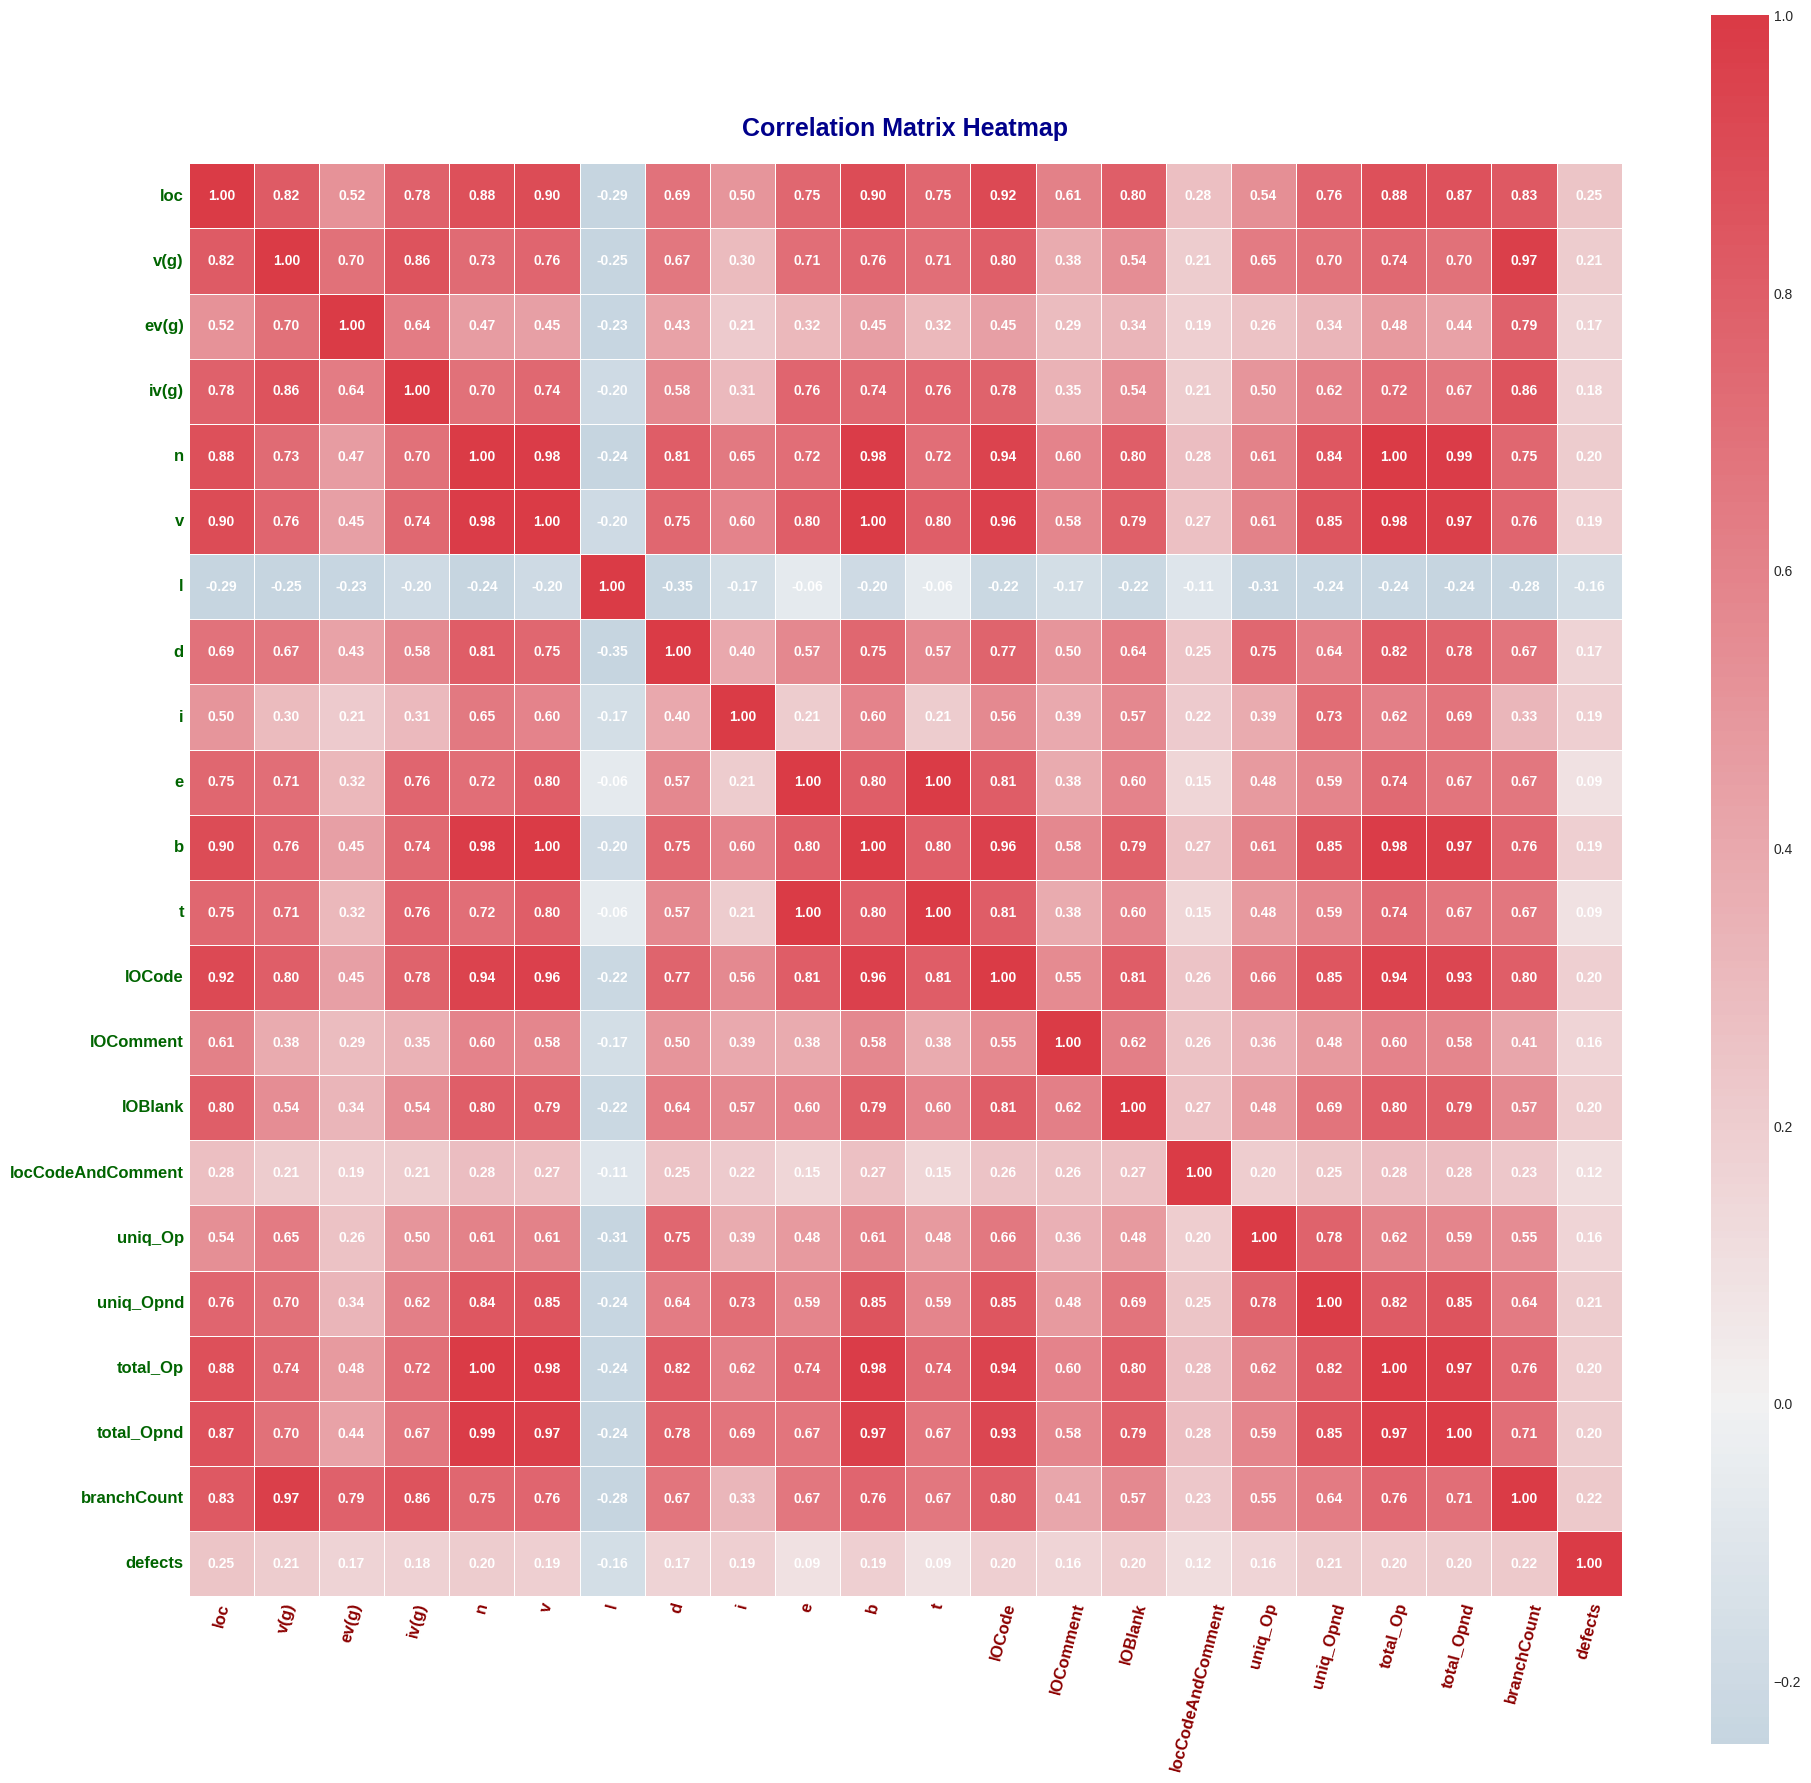

In [ ]:
corr_matrix = JM1Dataset.corr()

plotLIB.style.use('seaborn-darkgrid')

# Define the color palette and update colormap
custom_cmap = sBorn.diverging_palette(240, 10, n=256, as_cmap=True)  # Diverging palette for better balance

# Create a figure with modified dimensions
plotLIB.figure(figsize=(20, 25))

# Plot the heatmap with new color and style options
sBorn.heatmap(corr_matrix,
            annot=True,
            cmap=custom_cmap,  # Use the custom diverging palette
            fmt=".2f",
            annot_kws={"size": 10, "weight": "bold", "color": "white"},  # Customize annotation text
            linewidths=0.6,
            square=True,  # Keep cells square
            cbar_kws={"shrink": 0.7, "aspect": 30},  # Adjust color bar
            center=0,  # Set colormap center
            robust=True)  # Enhance colors for extreme values

# Modify title and axis font properties
plotLIB.title('Correlation Matrix Heatmap', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plotLIB.xticks(fontsize=12, rotation=75, weight='bold', color='darkred')  # Rotate and color x-axis labels
plotLIB.yticks(fontsize=12, weight='bold', color='darkgreen')  # Style y-axis labels

# Ensure the layout is optimized
plotLIB.tight_layout()

# Show the plot
plotLIB.show()

In [ ]:
# Get the count of eachuniquevalue in the 'defects' column and store it in a variable
defects_counts = JM1Dataset['defects'].value_counts()

# Create a pie chart to visualize the distribution of defects
fig = POX.pie(defects_counts,
             values=defects_counts.values,  # Set the values for the pie chart (counts of defects)
             names=defects_counts.index,    # Set the names for the pie slices (unique defect types)
             title='Distribution of Defects')  # Set the title of the pie chart

# Display the pie chart
fig.show()

### ***Outlier Check***

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'loc'),
  Text(1, 0, 'v(g)'),
  Text(2, 0, 'ev(g)'),
  Text(3, 0, 'iv(g)'),
  Text(4, 0, 'n'),
  Text(5, 0, 'v'),
  Text(6, 0, 'l'),
  Text(7, 0, 'd'),
  Text(8, 0, 'i'),
  Text(9, 0, 'e'),
  Text(10, 0, 'b'),
  Text(11, 0, 't'),
  Text(12, 0, 'lOCode'),
  Text(13, 0, 'lOComment'),
  Text(14, 0, 'lOBlank'),
  Text(15, 0, 'locCodeAndComment'),
  Text(16, 0, 'uniq_Op'),
  Text(17, 0, 'uniq_Opnd'),
  Text(18, 0, 'total_Op'),
  Text(19, 0, 'total_Opnd'),
  Text(20, 0, 'branchCount'),
  Text(21, 0, 'defects')])

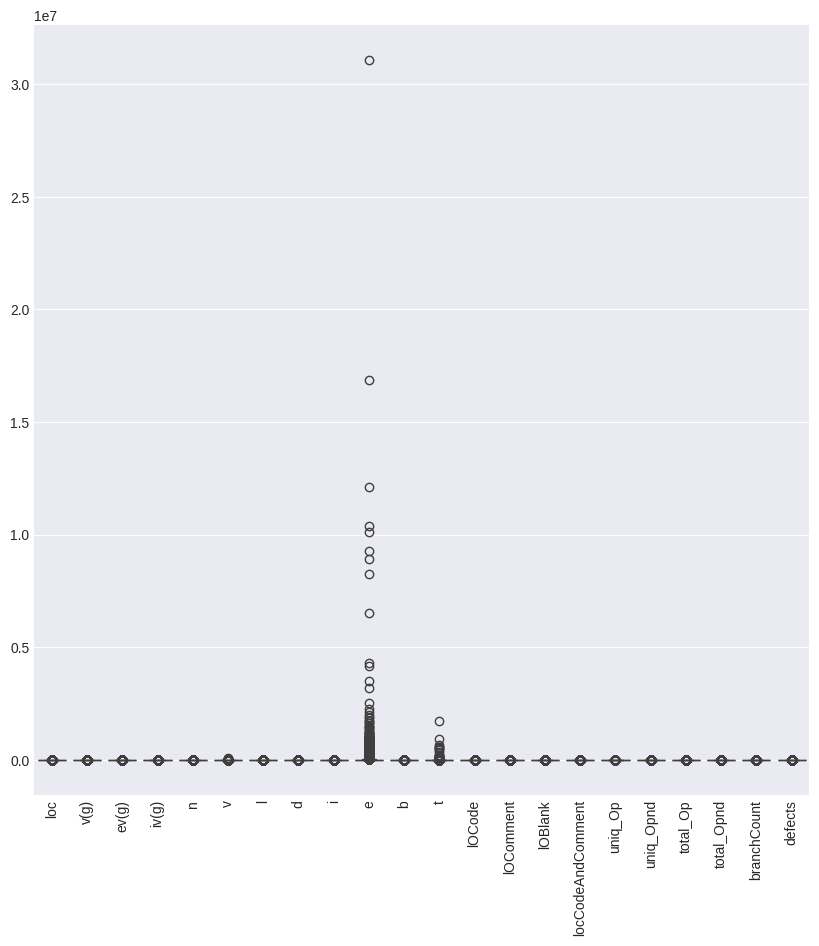

In [ ]:
# Set the figure size for the plot to 10x10 inches
plotLIB.figure(figsize=(10, 10))

# Create a box plot for the entire JM1Dataset to visualize the distribution of data across all columns
sBorn.boxplot(JM1Dataset)

# Rotate the x-axis tick labels by 90 degrees for better readability
plotLIB.xticks(rotation=90)

### ***Removing outliers***

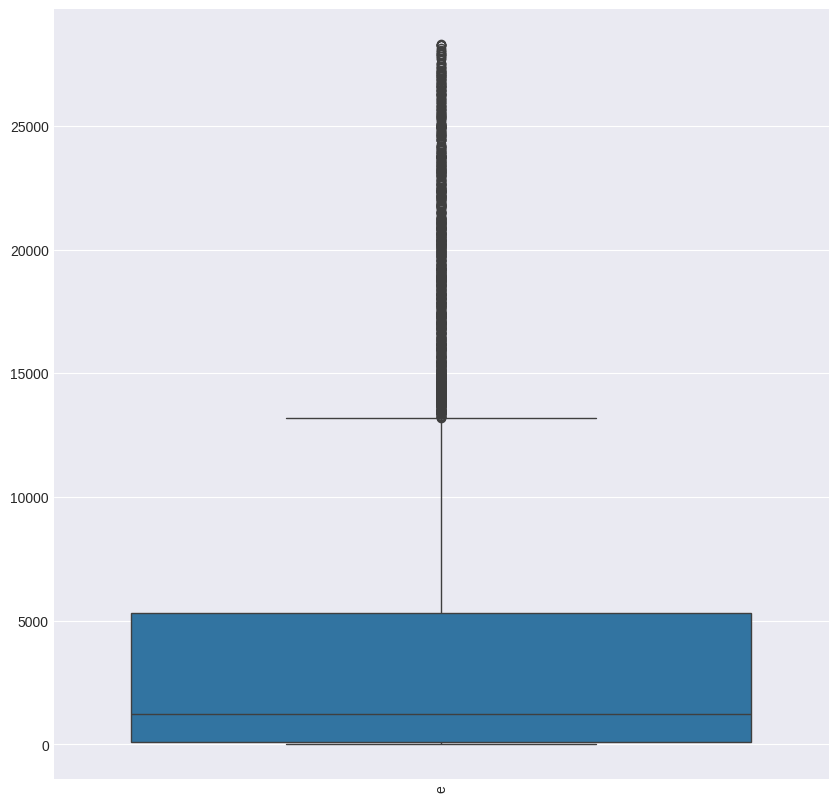

In [ ]:
# Created a function that uses the InterquartileRange(IQR) approach to eliminateoutliers.
def remove_outliers_iqr(JM1Dataset, column):
    # Determine the given column's first quartile (Q1).
    Q1 = JM1Dataset[column].quantile(0.25)
    # Determine the given column's third quartile (Q3).
    Q3 = JM1Dataset[column].quantile(0.75)
    # Determine the IQR, or interquartile range.
    IQR = Q3 - Q1
    # Establish the outliers' lower bound.
    lower_bound = Q1 - 1.5 * IQR
    # Establish the upper limit for outliers.
    upper_bound = Q3 + 1.5 * IQR
    # Using the determined constraints, filter the dataset to exclude outliers.
    JM1Dataset_filtered = JM1Dataset[(JM1Dataset[column] >= lower_bound) & (JM1Dataset[column] <= upper_bound)]
    return JM1Dataset_filtered

# To eliminate outliers, iterate across the designated columns.
for column in ['e']:
    JM1Dataset = remove_outliers_iqr(JM1Dataset, column)

# Assign 10x10 inches as the box plot's figure size.
plotLIB.figure(figsize=(10, 10))
# Make a box plot using column 'e''s filtered data.
sBorn.boxplot(data=JM1Dataset[['e']])
# To make the xaxis ticklabels easiertoread, rotate them by 90 degrees.
plotLIB.xticks(rotation=90)
# Make the box plotvisible.
plotLIB.show()

### ***Label Encoder***

In [ ]:
# The LabelEncodershould be imported from the preprocessingmodule.
label_encoder = preprocessing.LabelEncoder()

# Convert the values in the 'uniq_Op' column to numbers.
JM1Dataset['uniq_Op'] = label_encoder.fit_transform(JM1Dataset['uniq_Op'])

# The 'uniq_Opnd' column should be encoded into numeric values.
JM1Dataset['uniq_Opnd'] = label_encoder.fit_transform(JM1Dataset['uniq_Opnd'])

# Enter numerical values in the 'total_Op' column.
JM1Dataset['total_Op'] = label_encoder.fit_transform(JM1Dataset['total_Op'])

# Produce numerical values from the 'total_Opnd' column.
JM1Dataset['total_Opnd'] = label_encoder.fit_transform(JM1Dataset['total_Opnd'])

# Convert the 'branchCount' column's values to numbers.
JM1Dataset['branchCount'] = label_encoder.fit_transform(JM1Dataset['branchCount'])

# Give numerical values to the 'defects' column.
JM1Dataset['defects'] = label_encoder.fit_transform(JM1Dataset['defects'])

In [ ]:
JM1Dataset.dtypes

,0
loc,int64
v(g),int64
ev(g),int64
iv(g),int64
n,int64
v,float64
l,float64
d,float64
i,float64
e,float64


### ***Split X,y***

In [ ]:
# The 'defects' column is removed from the dataset to createfeatureset X.
X = JM1Dataset.drop('defects', axis=1)

# Choose the 'defects' column from dataset to created targetvariable y.
y = JM1Dataset['defects']

In [ ]:
# Verifying the variable X's form
X.shape

(9305, 21)

In [ ]:
# Verifying the variable y's form
y.shape

(9305,)

### ***Data Normalization: Standerd Scaler***

In [ ]:
# Create a StandardScaler instance to standardisefeatures by scaling to unitvariance and eliminatingmean.
scaler = StandardScaler()

# Normalised the data by fitting the scaler to feature set X and transforming it.
X_normalized = scaler.fit_transform(X)

# Using the normalisedfeatures, created a newDataFrame with the original X columnnames.
X_normalized_df = Pndas.DataFrame(X_normalized, columns=X.columns)

### ***Feature Selection: ANOVA***

In [ ]:
# Use the ANOVA F-value to choosefeatures.
f_statistic, p_values = f_classif(X_normalized_df, y)

# Construct a DataFrame to hold outcomes.
feature_scores = Pndas.DataFrame({'Feature': X_normalized_df.columns, 'F-statistic': f_statistic, 'p-value': p_values})

# Features are sorted in descending order by F-statistic.
feature_scores = feature_scores.sort_values('F-statistic', ascending=False)

# Prior to choosing a feature
fig_before = POX.bar(feature_scores, x='Feature', y='F-statistic', title='Feature Importance Before Selection')
fig_before.show()


# Use the F-statistic to choose top k features.
k = 10  # Decide how many of best characteristics to choose.
selected_features = feature_scores['Feature'][:k].tolist()

# Make a fresh DataFrame with just a few chosen features.
X_selected = X_normalized_df[selected_features]

# Make feature selections for selected datausing the ANOVA Fvalue.
f_statistic_selected, p_values_selected = f_classif(X_selected, y)

# Made a DataFrame to hold the chosen data's results.
feature_scores_selected = Pndas.DataFrame({'Feature': X_selected.columns, 'F-statistic': f_statistic_selected, 'p-value': p_values_selected})

# Created a DataFrame to store the results for the selecteddata.
feature_scores_selected = feature_scores_selected.sort_values('F-statistic', ascending=False)

# After choosing a feature
fig_after = POX.bar(feature_scores_selected, x='Feature', y='F-statistic', title='Feature Importance After Selection')
fig_after.show()